In [13]:
import matplotlib.pyplot as plt

In [5]:
# import packages
import os
from cmdstanpy import cmdstan_path, CmdStanModel

# specify Stan program file
bernoulli_stan = os.path.join(r"C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab1\Exercise 2\bern_1.stan")

# instantiate the model; compiles the Stan program as needed.
bernoulli_model = CmdStanModel(stan_file=bernoulli_stan)

# inspect model object
print(bernoulli_model)

INFO:cmdstanpy:found newer exe file, not recompiling


CmdStanModel: name=bern_1
	 stan_file=C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab1\Exercise 2\bern_1.stan
	 exe_file=C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab1\Exercise 2\bern_1.exe
	 compiler_options=stanc_options={}, cpp_options={}


In [6]:
bernoulli_data = os.path.join(r"C:\Users\TOSHIBA\Desktop\CPS\Semester 1\Data analysis\Lab1\Exercise 2\bernoulli.data.json")

# fit the model
bern_fit = bernoulli_model.sample(data=bernoulli_data, output_dir='.')

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [15]:
theta = bern_fit.stan_variable('theta')
summary = bern_fit.summary()

(array([  2.,   6.,  18.,  33.,  53.,  90., 190., 242., 367., 418., 429.,
        497., 450., 420., 323., 229., 136.,  59.,  32.,   6.]),
 array([0.11871   , 0.15884615, 0.1989823 , 0.23911845, 0.2792546 ,
        0.31939075, 0.3595269 , 0.39966305, 0.4397992 , 0.47993535,
        0.5200715 , 0.56020765, 0.6003438 , 0.64047995, 0.6806161 ,
        0.72075225, 0.7608884 , 0.80102455, 0.8411607 , 0.88129685,
        0.921433  ]),
 <BarContainer object of 20 artists>)

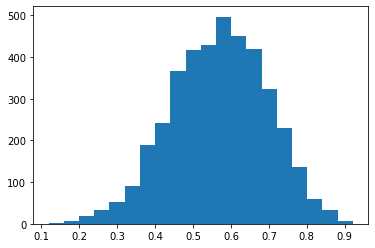

In [16]:
plt.hist(theta, bins=20)

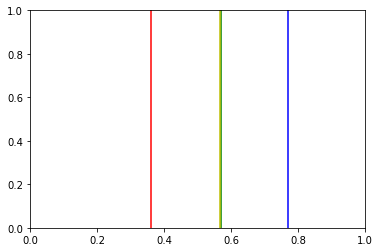

In [17]:
plt.axvline(summary['5%']['theta'], color='r')
plt.axvline(summary['50%']['theta'], color='g')
plt.axvline(summary['95%']['theta'], color='b')
plt.axvline(theta.mean(), color='y')
plt.show()